## Bike Sharing Assignment

#### Business Overview:

BoomBikes provides service in which bikes are made available for shared use to individuals for a fee or free. Boom bike allows individuals to borrow bike from a dock and return it to any other dock in system. Entire process is centrally managed.

#### Pain points:
Due to covid pandemic it has seen siginificant downturn in business and would like to acclerate its revenue once the pandemic ends.

#### Objective
Essentially, the company wants —


- To identify features that influence hire count so that it acclerate business growth
- Model existing variables


#### Quick Bits
- Regression model as we are trying to predict continous variable


## Reading and Understanding the Data

In [65]:
#import basic library to read filrs
import pandas as pd
import numpy as np
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
#read the file
bikeusage=pd.read_csv("day.csv")

In [67]:
#get the number of columns
bikeusage.shape

(730, 16)

In [68]:
#looking at non null stats of file. Since all non null values = row count. We can assume that file is not empty
bikeusage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observation
- Since number of rows and non null rows are equal there are no rows that need data imputation

In [69]:
# Looking at the first five rows
bikeusage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
#gettiing the basic statistics of numeric fields
bikeusage.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [71]:
#checking if there are duplicates in data.
bikeusage.duplicated().sum()

0

#### Observation
- By looking at above we see there are no duplicates
- Overall spread of data does not seem to have a significant outliers. We will still check it further

In [72]:
#instant: record index we dont need it for analysis
# registered and casual are summed up to cnt. Also since these are related to variable of interest cnt. it leads to target leak. dropping these
# we can drop dteday as we have other variables like yr/mnth/weekday giving enough information
bikeusage.drop(['instant','casual','registered','dteday'], axis=1, inplace=True)

In [73]:
#import the graphical libraries
import seaborn as sns
import matplotlib.pyplot as plt

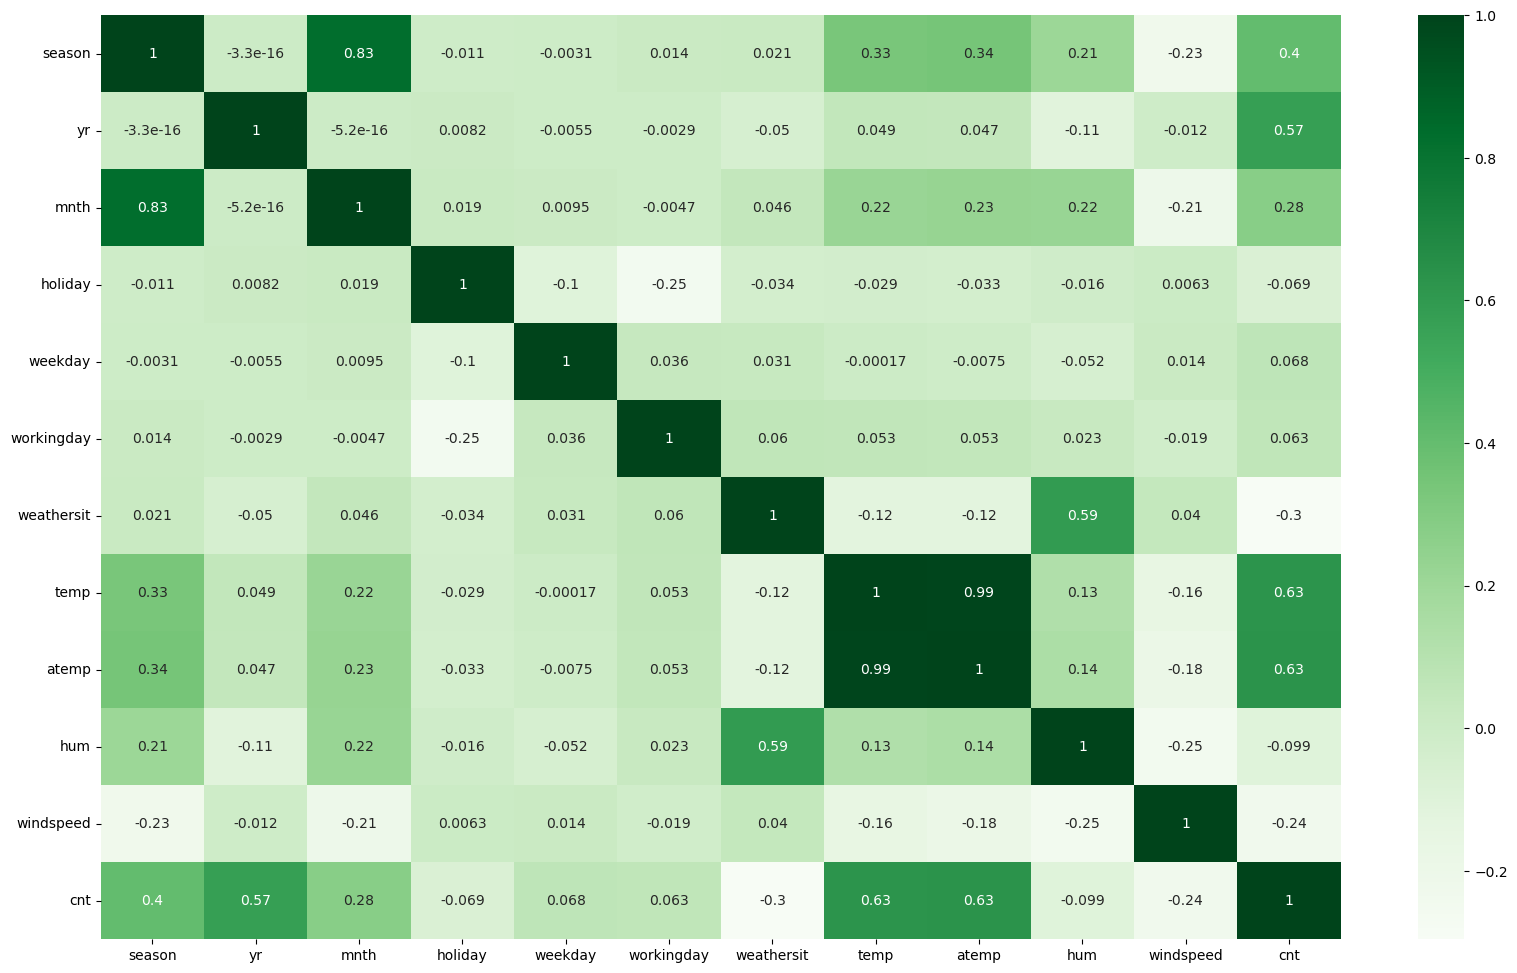

In [74]:
#plot the corelation plot for different variables
plt.figure(figsize=(20,12))
sns.heatmap(bikeusage.corr(), cmap='Greens', annot=True)
plt.show()

#### Observation
- By looking at above graph we see cnt is appears to be highly corelated with casual/registered/instant/temp/atemp/ variables

In [75]:
#atemp and temp are excessively corelated (95%) so dropping atemp
bikeusage.drop(['atemp'], axis=1, inplace=True)

In [76]:
# categorical variables
categorical = ['season','mnth','holiday','weekday', 'workingday','weathersit','yr']

# identify numeric variables
numeric = ['temp', 'hum','windspeed','cnt']

In [77]:
#converting the types to appropriate categorical type
bikeusage[categorical]=bikeusage[categorical].astype("category")

In [78]:
#getting basic stetistics about variables of interest
bikeusage.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [79]:
#getting basic statestics for categorical variables
bikeusage.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [80]:
#convert weathersit/season/mnth and weekday to its string representation.
bikeusage['weathersit']=bikeusage['weathersit'].map(
                {
                    1 :'Clear_cloudy', 
                    2: 'Mist_Few_clouds', 
                    3: 'Light_Snow_Rain_Thunderstorm', 
                    4 :'Heavy_Rain_Ice_Fog'
                })
bikeusage['season']=bikeusage['season'].map({1 :'spring', 2: 'summer', 3: 'fall', 4 :'winter' })
bikeusage['weekday'] = bikeusage['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bikeusage['mnth'] = bikeusage['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'})

## Visualising the Data

In [81]:
#import graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x400 with 0 Axes>

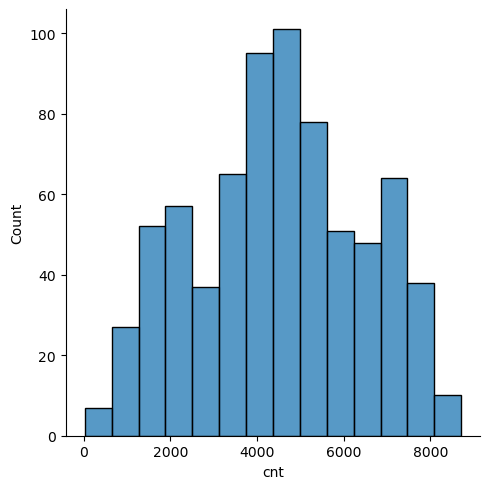

In [82]:
# we can see that the median of cnt is around 4.5k and follows somewhat a normal distribution
plt.figure(figsize=(20,4))
sns.displot(bikeusage.cnt)
plt.show()

#### Observation
- By looking at above cnt follow normal kind of distribution and median around 4000-5000

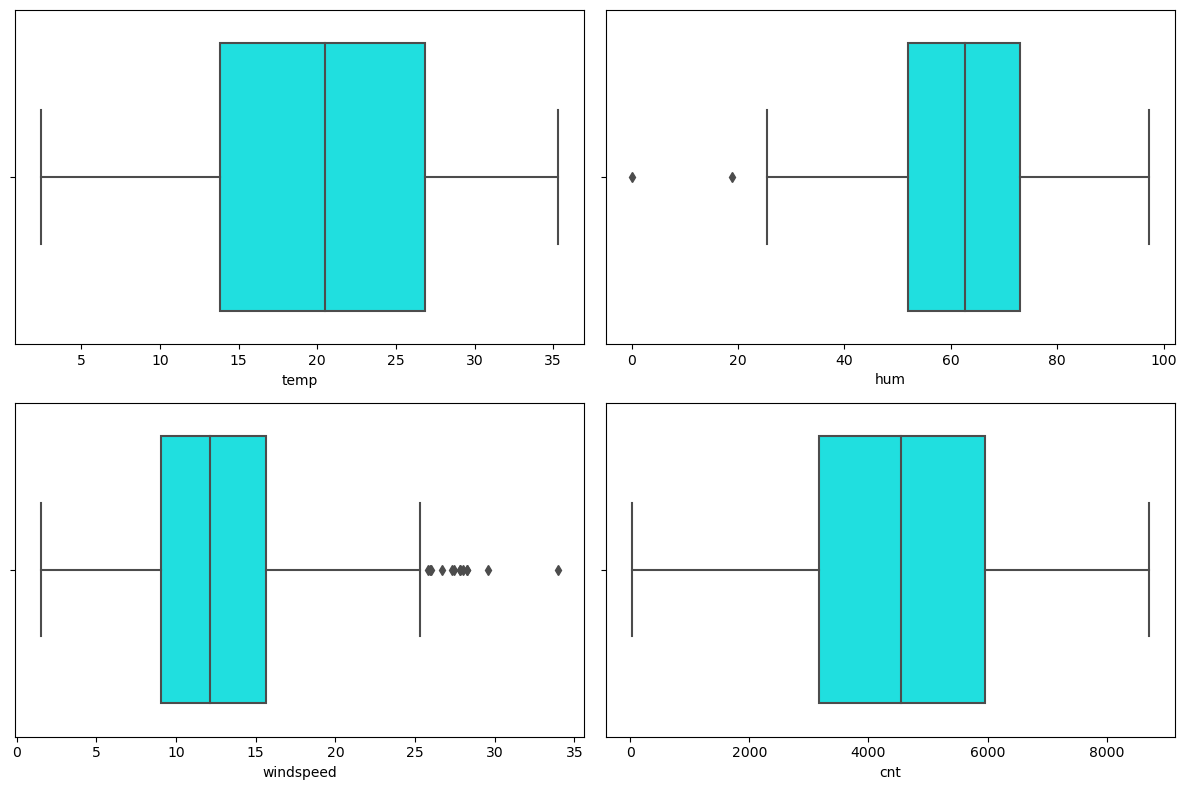

In [83]:
#getting all the numeric variables
numeric_columns = bikeusage.select_dtypes(exclude='category').columns
#set the number of columns to 2
numcol=2
#get the number of rows to plot
rows=len(numeric_columns)//numcol
#set the fig size
plt.figure(figsize=(12,8))
#for each numeric column plot
for index,column in enumerate(numeric_columns):
    #choose the plot
    plt.subplot(rows,numcol,index+1)
    #plot the box plot
    sns.boxplot(x=column, data=bikeusage, color='cyan')
plt.tight_layout()   
plt.show()    

#as we can see windspeed and humidity have outliers but they seem to be within acceptable range
    

#### Observation
- By looking at above there are few outliers for windspeed and humidity. Numerically they look to be within acceptable range so not removing those

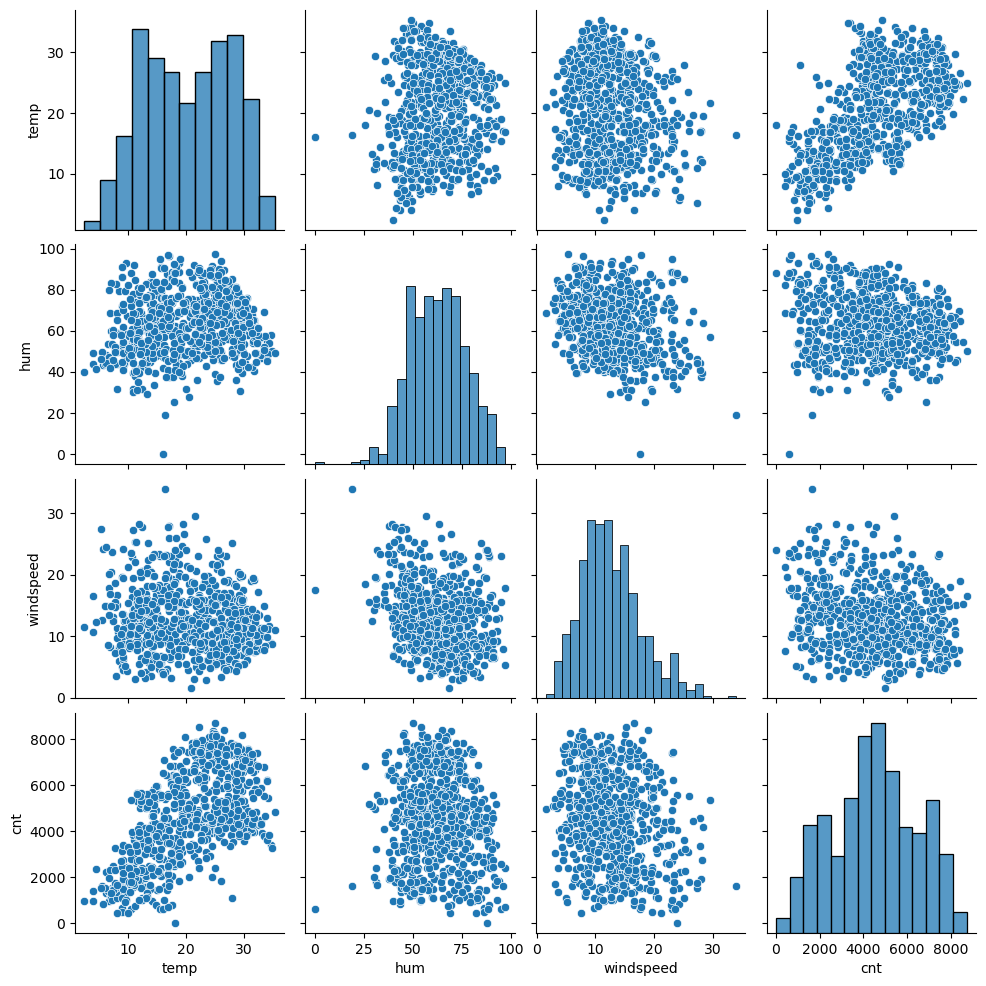

In [84]:
#plotting the numeric variables. We can see that temprature is having maximum corelation to cnt and appears to be linear
sns.pairplot(bikeusage[bikeusage.select_dtypes(exclude='category').columns])
plt.show()

#### Observation
- By looking at above plot we see temp is the best corelated variable to count

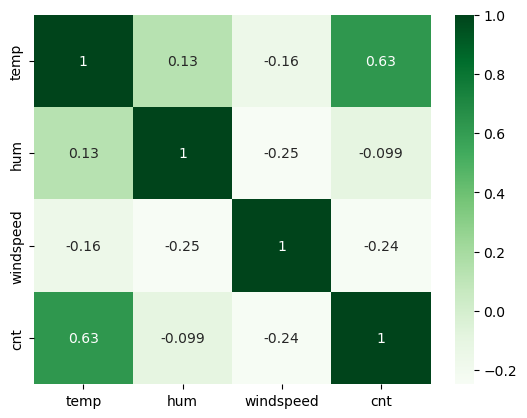

In [85]:
#confirmation from corelation plot
sns.heatmap(bikeusage[bikeusage.select_dtypes(exclude='category').columns].corr(), cmap="Greens", annot=True)
plt.show()

#above plot shows that as temprature increases no of bikers also increase
#also there is a decrease observed if windspeed and humidity increase

#### Observation
- By looking at above it feels that increase in windspeed or humidity causes less people to rent bike

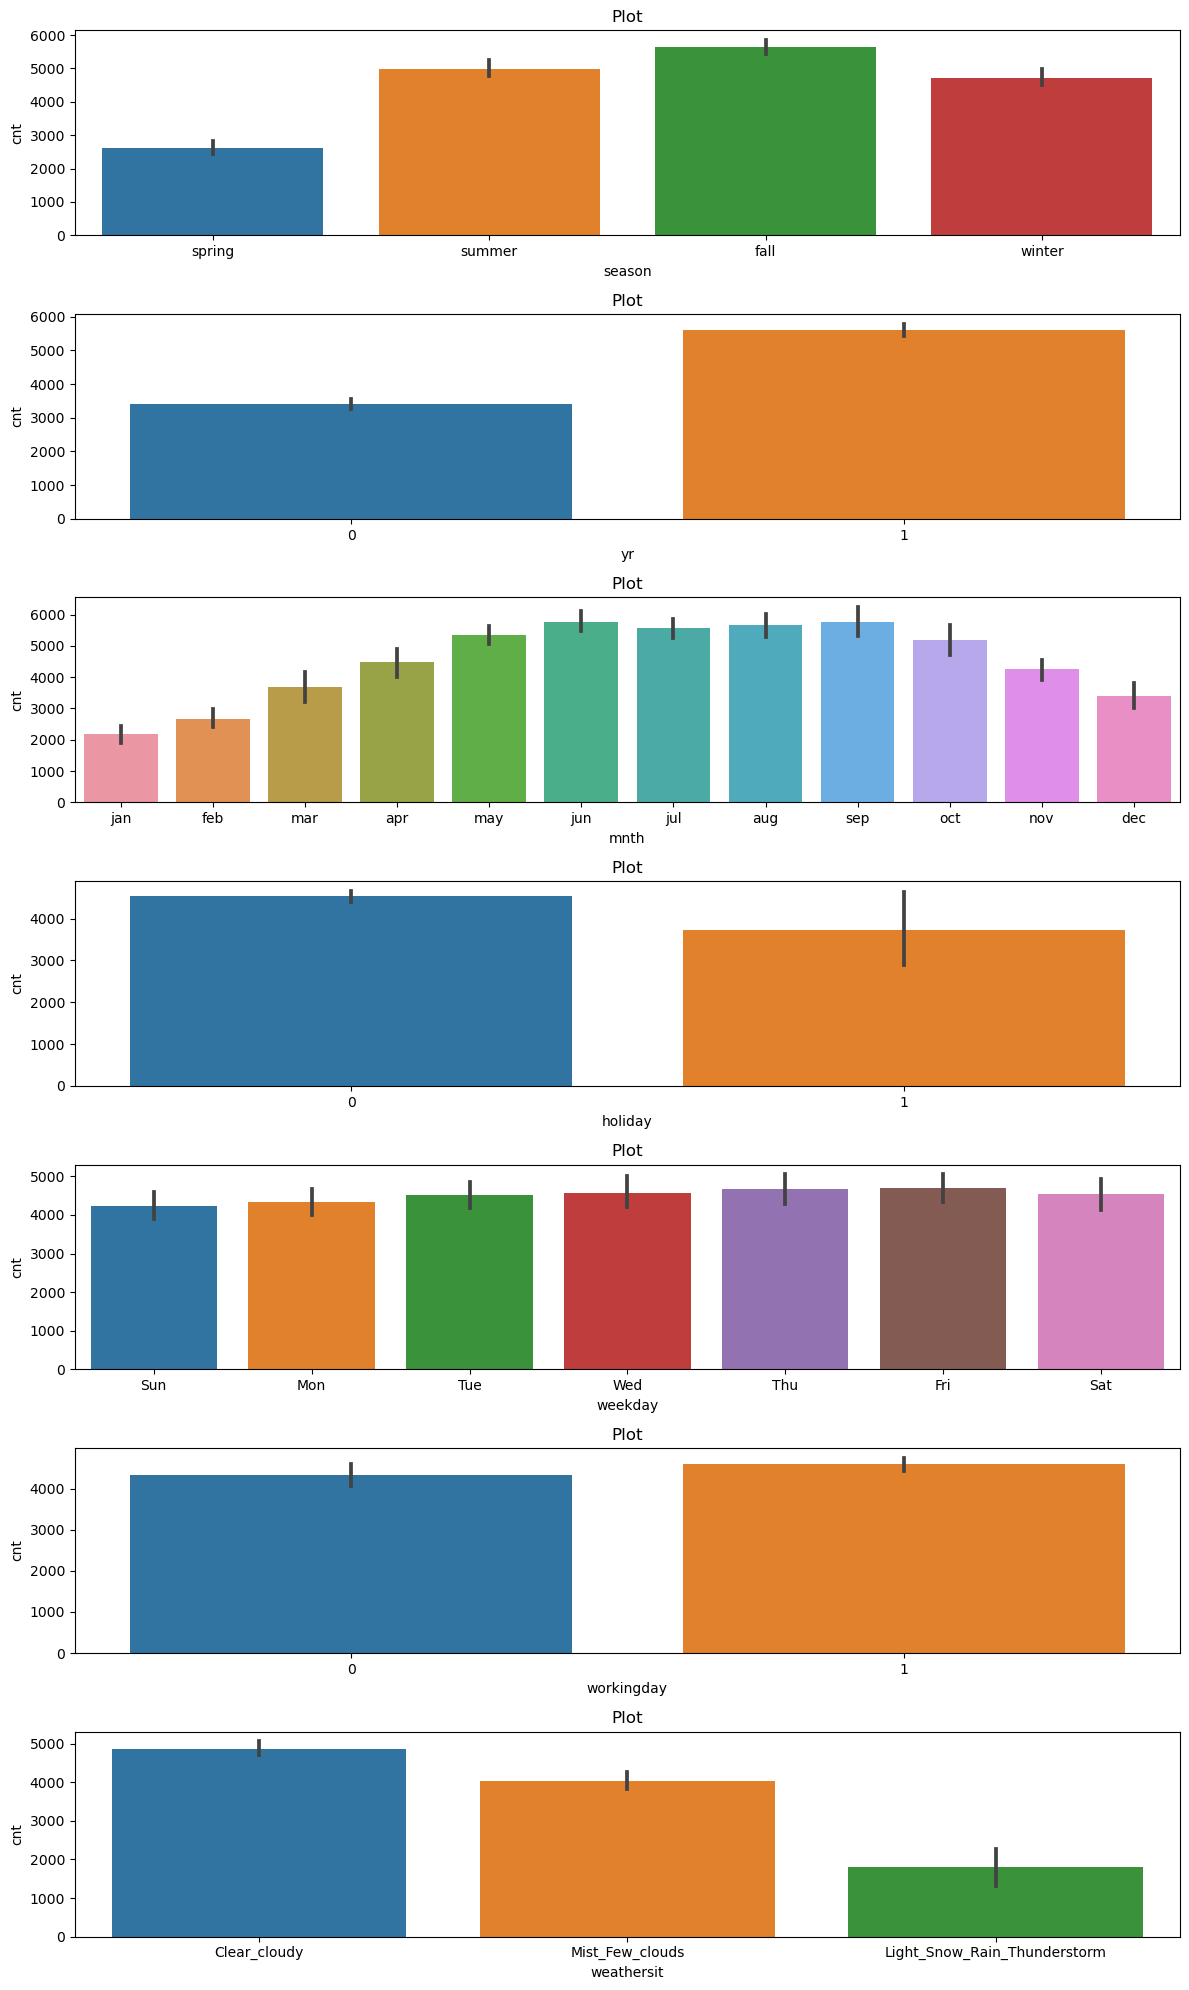

In [86]:
#plotting categorical variables wrt count. We can see that we have goodpatronage in summer/fall and winter
#From Dec to March we see a gradual decline in patronage
#people tend to use cycles more on workdays
#bike demand is low when we have light rain etc

numeric_columns = bikeusage.select_dtypes(include='category').columns
numcol=1
rows=len(numeric_columns)//numcol
plt.figure(figsize=(12,20))
for index,column in enumerate(numeric_columns):
    plt.subplot(rows,numcol,index+1)
    sns.barplot(x=column, y='cnt', data=bikeusage)
    plt.title(f"Plot")
plt.tight_layout()   
plt.show()    

#### Observation
By looking below are the observationa
   - When weather is clear people tend to rent a bike
   - There doesnt seem to be a pattern where bike users prefer use of bike on specific day
   - More people tend to hire on working day this can be seen with holiday chart
   - November to March seems to be month where people tend to avoid bikes. It concides with winter/spring
   - As observerd more hire occured in 2019 compared to 2018
   

## Data Preparation


In [87]:
#getting top n rows

bikeusage.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist_Few_clouds,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist_Few_clouds,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear_cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear_cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear_cloudy,9.305237,43.6957,12.522300,1600


In [88]:
#this column has only 3 values so we cannot do dummy coumn creation with inplace=True
bikeusage.weathersit.unique()

['Mist_Few_clouds', 'Clear_cloudy', 'Light_Snow_Rain_Thunderstorm']
Categories (3, object): ['Clear_cloudy', 'Mist_Few_clouds', 'Light_Snow_Rain_Thunderstorm']

In [89]:
#We can do inplace = True as it has all levels
bikeusage.season.unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [90]:
#We can do inplace = True  as it has all levels
bikeusage.mnth.unique()

['jan', 'feb', 'mar', 'apr', 'may', ..., 'aug', 'sep', 'oct', 'nov', 'dec']
Length: 12
Categories (12, object): ['jan', 'feb', 'mar', 'apr', ..., 'sep', 'oct', 'nov', 'dec']

In [91]:
#We can do inplace = True  as it has all levels
bikeusage.weekday.unique()

['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [92]:
#we will be converting categorical variables to dummy. We will endcode in such a manner that n-1 variables are created for n levels
#will take only those columns where values are not int

#
categorical_columns =['season', 'mnth', 'weekday']
for index,column in enumerate(categorical_columns):
    status = pd.get_dummies(bikeusage[column], drop_first = True)
    bikeusage = pd.concat([bikeusage, status], axis = 1)
    bikeusage.drop(column, axis=1,inplace=True)

categorical_columns =['weathersit']
for index,column in enumerate(categorical_columns):
    status = pd.get_dummies(bikeusage[column], drop_first = False)
    bikeusage = pd.concat([bikeusage, status], axis = 1)
    bikeusage.drop(column, axis=1,inplace=True)    


In [93]:
#converting the types to appropriate int type
variables = ['holiday','workingday']
bikeusage[variables]=bikeusage[variables].astype("uint8")

## Splitting the Data into Training and Testing Sets

In [94]:
#create the training and testing set in 70-30 split
from sklearn.model_selection import train_test_split

In [95]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeusage, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [96]:
#Use the min max scaler to scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
#rescaling the numeric fields which have values outside 0 and 1
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [99]:
#Verifying the scaling as the max value is 1
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,feb,...,dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear_cloudy,Mist_Few_clouds,Light_Snow_Rain_Thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,...,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.627451,0.343137,0.029412
std,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,...,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


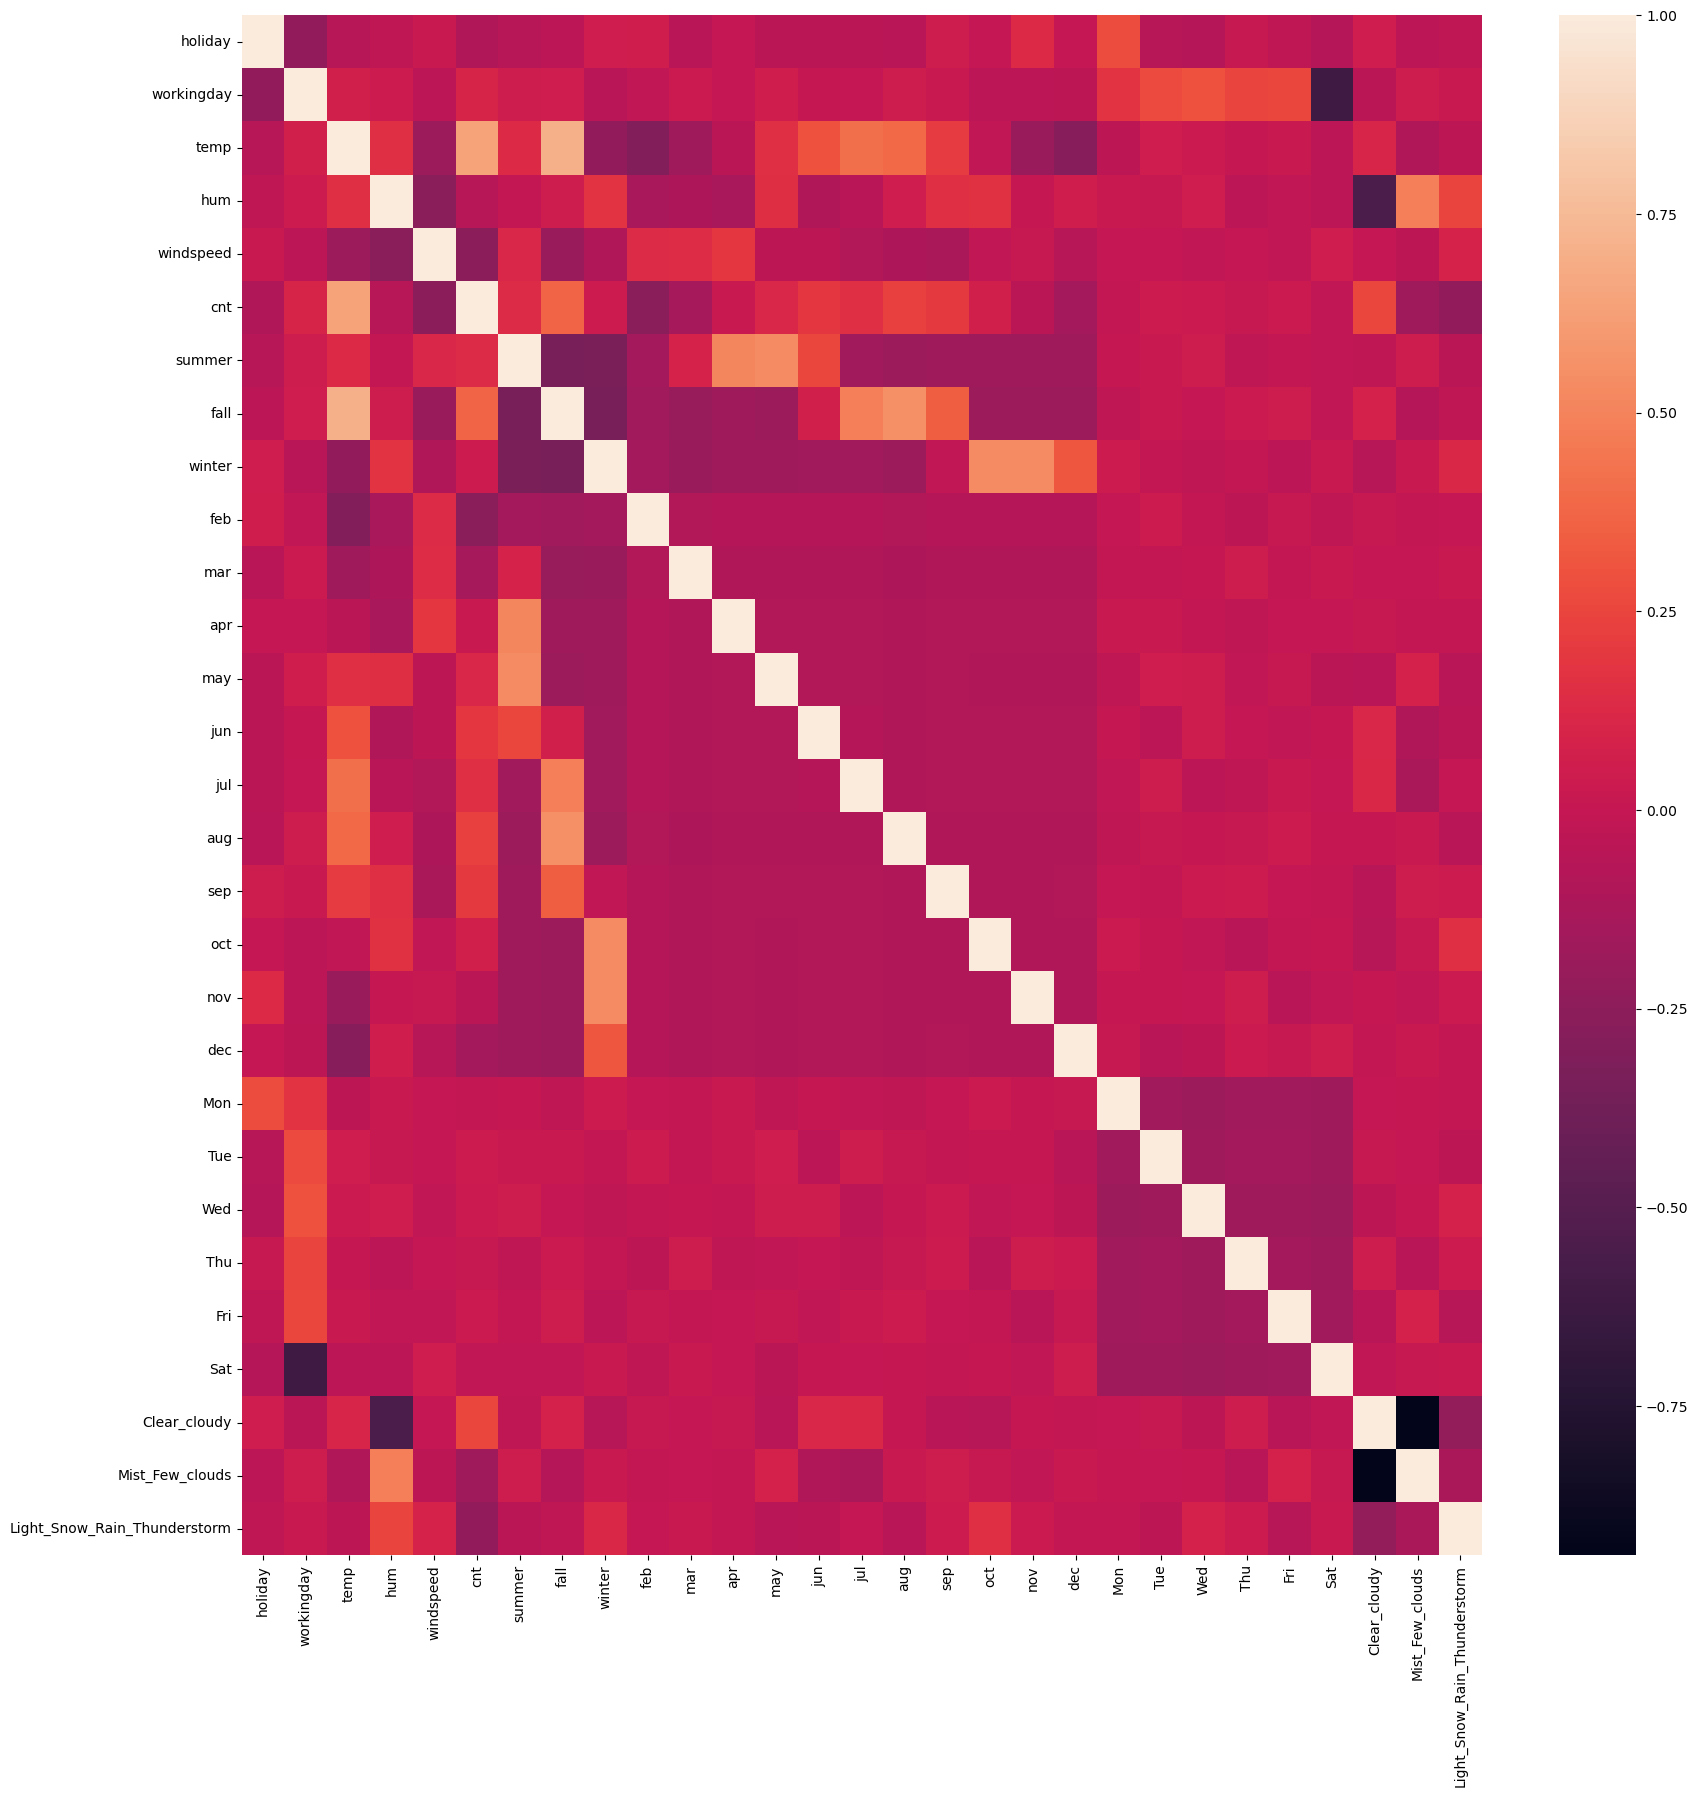

In [100]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = False)
plt.show()

#### Observation
- By looking below are the observationaFrom above plt we can say cnt is highly corelared to temp
- Negative corelation observed saturday and working day
- Negative corelation between clear/cloudy and few clouds
- Winter is positively corelated to oct and Nov
   

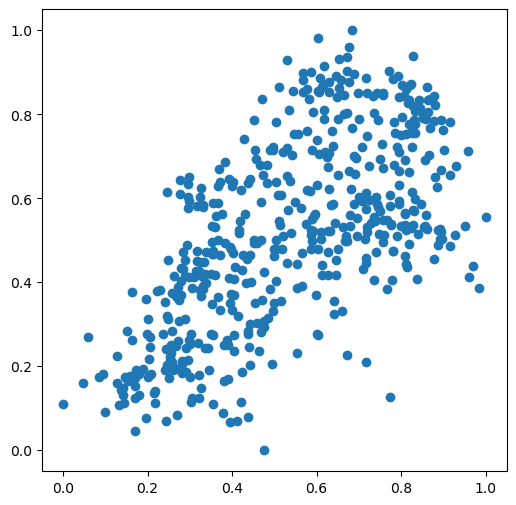

In [101]:
# as we can see that cnt is related to temprature lets see plot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


In [102]:
#dividing the data set into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [103]:
#import the modeling api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create method for computing VIF
def generateVIF(X):
    #generate empty dataframe 
    vif = pd.DataFrame()
    #generate features columns for storing columns
    vif['Features'] = X.columns
    #compute VIF for each column
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    #round it off 
    vif['VIF'] = round(vif['VIF'], 2)
    #sort it in descending
    vif = vif.sort_values(by = "VIF", ascending = False)
    #print values
    print(vif)

In [104]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
#fit the model
lm.fit(X_train, y_train)

#take top 15 influencing variables
rfe = RFE(lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)
#get all columns that were picked
col = X_train.columns[rfe.support_]
col
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [105]:
#train model
X_train_rfe = sm.add_constant(X_train_rfe)
#generate model and fit it
lm = sm.OLS(y_train,X_train_rfe).fit()
#show its statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          2.20e-167
Time:                        23:39:56   Log-Likelihood:                 457.31
No. Observations:                 510   AIC:                            -886.6
Df Residuals:                     496   BIC:                            -827.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0793      0.027      2.912      0.004       0.026       0.133
yr                               0.2287      0.009     25.399      0.000       0.211       0.246
holiday                         -0.0705      0.025     -2.768      0.006      -0.120      -0.020
workingday                       0.0272      0.009      3.171      0.002       0.010       0.044
temp                             0.6040      0.022     27.763      0.000       0.561       0.647
hum                             -0.1390      0.041     -3.356      0.001      -0.220      -0.058
windspeed                       -0.1694      0.028     -6.004      0.000      -0.225      -0.114
winter                           0.1139      0.011     10.395      0.000       0.092       0.135
Mon                             -0.0170      0.011     -1.591      0.112      -0.038       0.004
Tue                             -0.0167      0.012     -1.360      0.174      -0.041       0.007
Wed                             -0.0005      0.012     -0.046      0.963      -0.023       0.022
Thu                             -0.0078      0.012     -0.650      0.516      -0.031       0.016
Fri                             -0.0013      0.012     -0.102      0.919      -0.025       0.023
Clear_cloudy                     0.1238      0.009     13.372      0.000       0.106       0.142
Mist_Few_clouds                  0.0737      0.013      5.861      0.000       0.049       0.098
Light_Snow_Rain_Thunderstorm    -0.1182      0.024     -4.860      0.000      -0.166      -0.070
==============================================================================
Omnibus:                       39.763   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.748
Skew:                          -0.441   Prob(JB):                     2.40e-19
Kurtosis:                       4.805   Cond. No.                     1.87e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observation
- From adjusted R2 we are getting good accuracy of 80.6%
- For few column like Wed, Thu,Fri, Tue, Mon p values are more than 5% we need to drop those
- Also Prob (F-statistic) is near to 0 model seems to be good
   

In [106]:
#loop infinitely
while True:
    pValueExists = False;
    #get the record with max p value
    maxPValueCol=lm.pvalues[lm.pvalues==lm.pvalues.max()].index
    #if the p-value is greater than 5% then drop
    if(lm.pvalues[maxPValueCol[0]]>=0.05):
        #drop the column
        X_train_rfe.drop(maxPValueCol, axis=1, inplace=True)
        #retrain the model and check p-values again
        X_train_rfe = sm.add_constant(X_train_rfe)
        lm = sm.OLS(y_train,X_train_rfe).fit()
    else:
        #terminate loop
        break

In [107]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                       Features   VIF
7                  Clear_cloudy   inf
8               Mist_Few_clouds   inf
9  Light_Snow_Rain_Thunderstorm   inf
4                           hum  1.85
3                          temp  1.22
5                     windspeed  1.16
6                        winter  1.14
1                            yr  1.03
2                       holiday  1.01
0                         const  0.00


#### Observation
- From above since Clear_cloudy is having infinite vif lets drop it

In [108]:
#drop the column
X_train_rfe.drop('Clear_cloudy', axis=1, inplace=True)

In [109]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     257.4
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          4.66e-172
Time:                        23:39:56   Log-Likelihood:                 454.51
No. Observations:                 510   AIC:                            -891.0
Df Residuals:                     501   BIC:                            -852.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2177      0.030      7.337      0.000       0.159       0.276
yr                               0.2287      0.009     25.445      0.000       0.211       0.246
holiday                         -0.0973      0.028     -3.440      0.001      -0.153      -0.042
temp                             0.6058      0.022     27.881      0.000       0.563       0.648
hum                             -0.1419      0.041     -3.433      0.001      -0.223      -0.061
windspeed                       -0.1724      0.028     -6.116      0.000      -0.228      -0.117
winter                           0.1125      0.011     10.280      0.000       0.091       0.134
Mist_Few_clouds                 -0.0485      0.012     -4.172      0.000      -0.071      -0.026
Light_Snow_Rain_Thunderstorm    -0.2382      0.029     -8.180      0.000      -0.295      -0.181
==============================================================================
Omnibus:                       43.957   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.432
Skew:                          -0.507   Prob(JB):                     3.80e-20
Kurtosis:                       4.783   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation
- From adjusted R2 we are getting good accuracy of 80.4%. There is technically no dip in adj R2
- P-values are within acceptable range
- Also Prob (F-statistic) is near to 0 model seems to be good
   

In [110]:
#check the VIF again
generateVIF(X_train_rfe)

                       Features    VIF
0                         const  44.77
4                           hum   1.85
7               Mist_Few_clouds   1.55
8  Light_Snow_Rain_Thunderstorm   1.23
3                          temp   1.22
5                     windspeed   1.16
6                        winter   1.14
1                            yr   1.03
2                       holiday   1.01


#### Observation
- above VIF seems to be in good state.const has high vif lets leave it

## Residual Analysis of the train data

In [111]:
#let predict the values in training set
y_train_cnt=lm.predict(X_train_rfe)

In [112]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

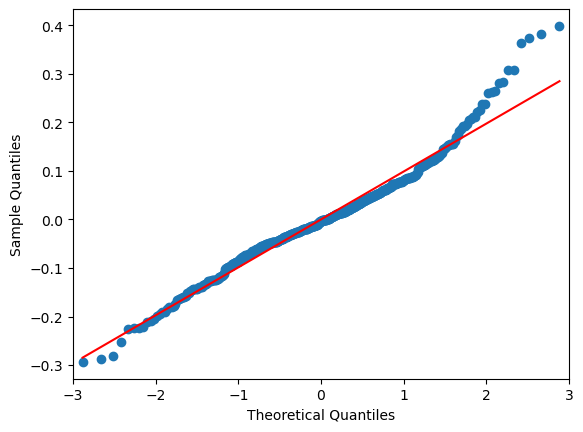

In [113]:
#plot the residuals
import statsmodels.api as sm
res=y_train_cnt-y_train
sm.qqplot(res, line ='r')
plt.show()

Text(0.5, 0, 'Errors')

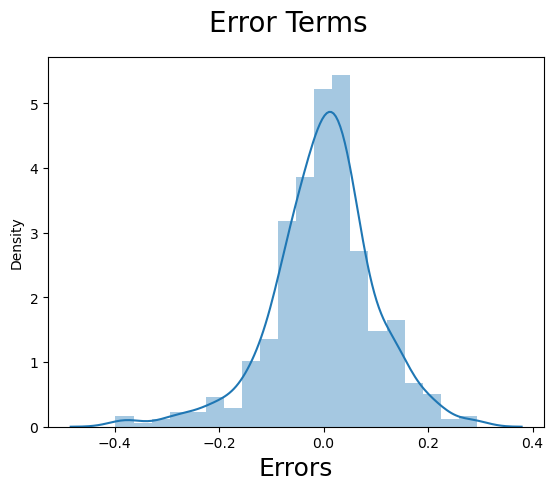

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation
- We can see that errors are normally distributed

## Making Predictions


In [115]:
#transform the testing set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [116]:
#create testing set series
y_test = df_test.pop('cnt')
X_test = df_test

In [117]:
#get the columns that were used in training set
cols = X_train_rfe.columns.to_list()

In [118]:
#remove the const column
cols.remove('const')

In [119]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[cols]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [120]:
# Making predictions on test set
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

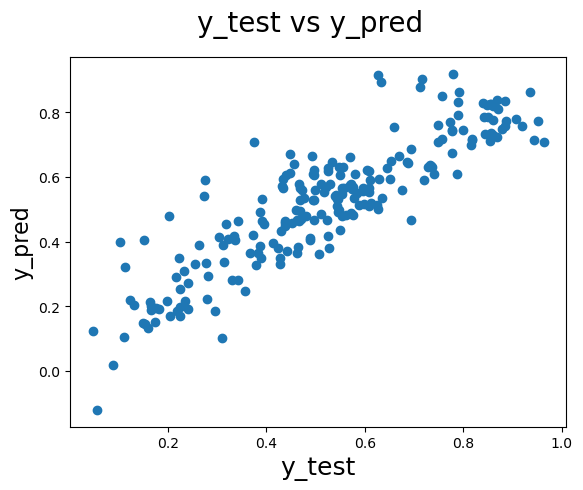

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'residual')

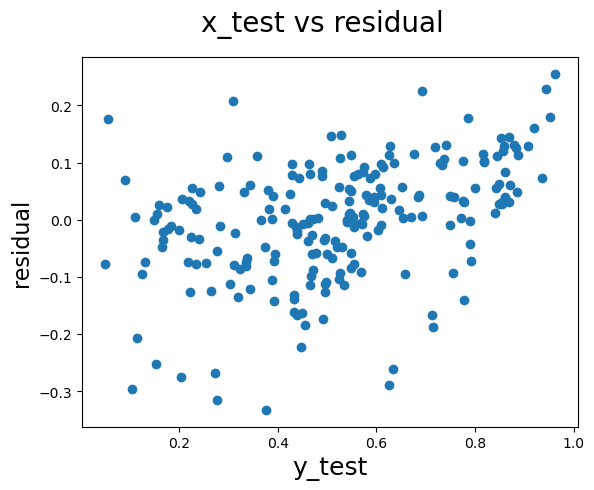

In [122]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,(y_test - y_pred))
fig.suptitle('x_test vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16)                          # Y-label

#### Observation
- From above since the graph is more of constant variance

In [123]:
#import the r2 library
from sklearn.metrics import r2_score
# get its r2 score
r2_score(y_true=y_test, y_pred=y_pred)

0.7745045874556256

#### Observation
- From above we can see that there is 2.5% dip in accuracy

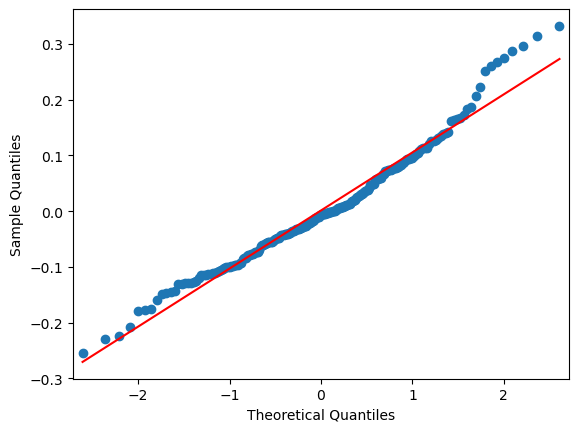

In [124]:
#plot the residuals
import statsmodels.api as sm
res=y_pred-y_test
sm.qqplot(res, line ='r')
plt.show()

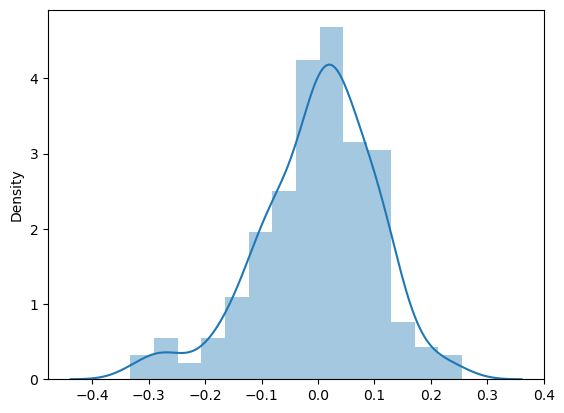

In [125]:
#plot the residuals
res=y_test-y_pred
sns.distplot(res)
plt.show()

#### Observation
- From above we can see that residuals are near normally distributed

### Equation

ypred= 0.2177 + yr*0.2287 - holiday*0.0973 + temp*0.6058 - hum*0.1419 - windspeed*0.1724 + winter*0.1125 -Mist_Few_clouds*0.0485 - Light_Snow_Rain_Thunderstorm*0.2382

## Conclusion
- yr,holiday,temp,hum,windspeed,winter,Mist_Few_clouds,Light_Snow_Rain_Thunderstorm influences the rental of bike

<Axes: xlabel='temp', ylabel='cnt'>

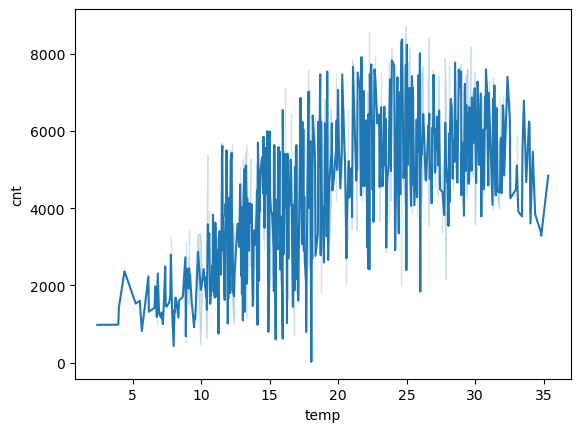

In [126]:
#plot to understand increase in temp and ridership count
sns.lineplot(x='temp',y='cnt',data=bikeusage)